**Вступление**

При исследовании астрономических объектов, таких как активные ядра галактик (AGN), астрономы сравнивают данные об этих объектах, полученные с разных телескопов на разных длинах волн.

Для этого требуется позиционное перекрестное сопоставление, чтобы найти ближайший аналог в пределах заданного радиуса на небе.

В этом упражнении вы сопоставите два каталога: один из радиообзора, каталог Bright Source Sample AT20G (BSS), и один из оптического обзора, каталог SuperCOSMOS all-sky galaxy.

В каталоге BSS перечислены самые яркие источники из радиосъемки AT20G, в то время как в каталоге SuperCOSMOS перечислены галактики, наблюдаемые в обзорах видимого света.mЕсли мы сможем найти оптическое соответствие для нашего радиоисточника, мы станем на шаг ближе к выяснению, что это за объект, например, галактика в локальной Вселенной или далекий квазар.

Мы выбрали один небольшой каталог (в BSS всего 320 объектов) и один большой (в SuperCOSMOS около 240 миллионов объектов), чтобы продемонстрировать проблемы, с которыми вы можете столкнуться при реализации алгоритмов перекрестного сопоставления.

**Экваториальные координаты**

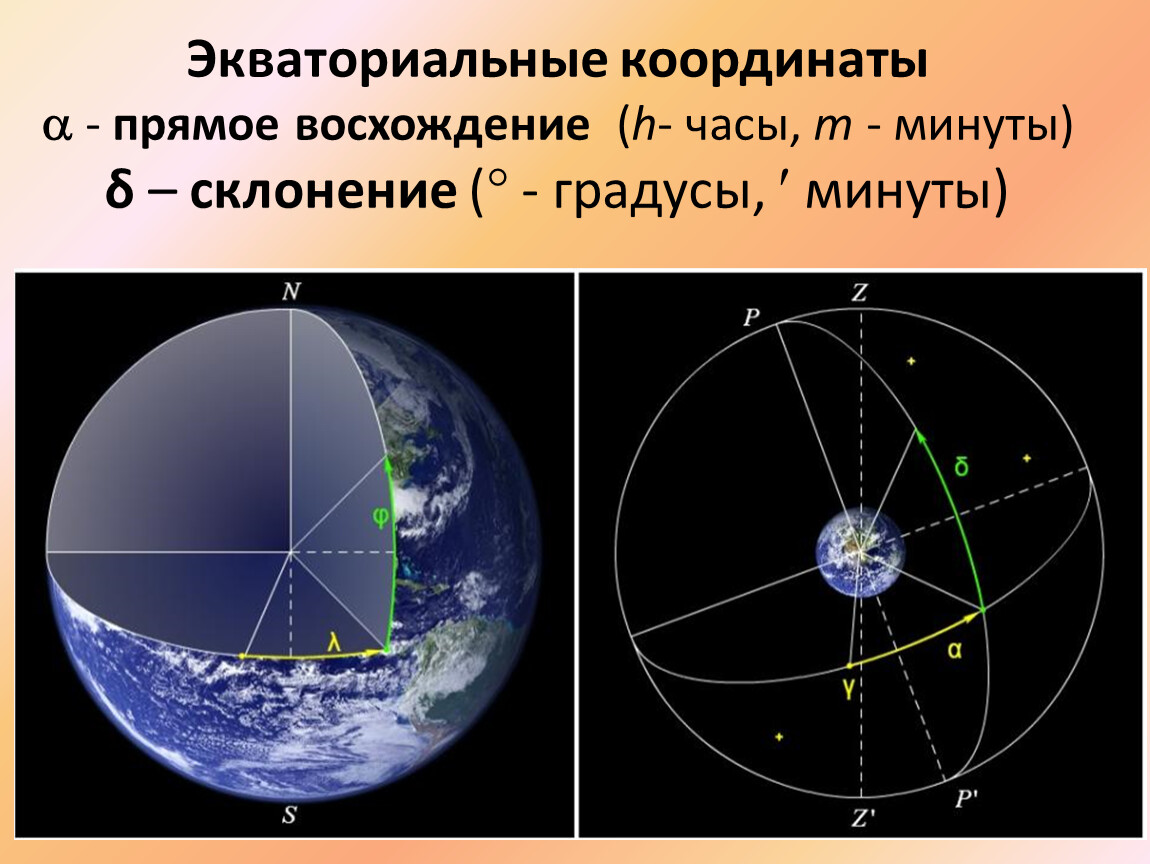

*Прямое восхождение(Right ascension)* : угол от точки весеннего равноденствия до точки, идущей на восток вдоль небесного экватора;
    
*Склонение(Declination)*: угол от небесного экватора до точки, идущей на север (отрицательные значения указывают на направление на юг).

**Прямое восхождение Right ascension**

Прямое восхождение часто дается в системе счисления часов-минут-секунд (HMS), потому что так было удобно вычислять, когда звезда появится над горизонтом. Полный круг в системе счисления HMS равен 24 часам, что означает, что 1 час в системе счисления HMS равен 15 градусам.

Каждый час делится на 60 минут, а каждая минута - на 60 секунд.

Вы можете перевести 23 часа, 12 минут и 6 секунд (записанных как 23:12:06 или 23h12m06s) в градусы следующим образом:

In [1]:
print(15*(23 + 12/60 + 6/(60*60)))

348.025


**Склонение Declination**

С другой стороны, склонение традиционно записывается в градусах-минутах-секундах (DMS). Полный круг равен 360 градусам, каждый градус равен 60 угловым минутам, а каждая угловая минута равна 60 угловым секундам.

Например: 73 градуса, 21 угловая минута и 14,4 угловых секунды (записанные 73:21:14.4 или 73° 21' 14.4" При отрицательных углах типа 73d21m14.4s) могут быть преобразованы в десятичные градусы следующим образом:

In [2]:
print(73 + 21/60 + 14.4/(60*60))

73.354


Угловые минуты и угловые секунды в DMS - это не то же самое, что минуты и секунды в HMS! Минута в HMS равна 15 угловым минутам в DMS, а секунда равна 15 угловым секундам.-5° 31' 12"

*Примечание: аркминуты и минуты - это разные вещи!
Угловые минуты и угловые секунды в DMS - это не то же самое, что минуты и секунды в HMS! Минута в HMS равна 15 угловым минутам в DMS, а секунда равна 15 угловым секундам.*

**Convert to decimal degrees**

Напишите две функции, одну, которая преобразует прямое восхождение из HMS в десятичные градусы, называется hms2dec, а другую, которая преобразует склонение из DMS в десятичные градусы, называется dms2dec .

Прямое восхождение - это всегда угол от 0 до 24 часов, а склонение - это всегда угол от -90 ° до + 90 °.

In [3]:
# Write your hms2dec and dms2dec functions here
def hms2dec(h, m, s):
  return 15*(h+m/60+s/3600)
def dms2dec(d, m, s):
  return d+m/60+s/3600 if d > 0 else -1*(-1*d+m/60+s/3600)

if __name__ == '__main__':
  print(hms2dec(23, 12, 6))

  print(dms2dec(22, 57, 18))

  print(dms2dec(-66, 5, 5.1))

348.025
22.955
-66.08475


**Угловое расстояние**

Чтобы сопоставить два каталога, нам нужно сравнить угловое расстояние между объектами на небесной сфере.

Люди свободно называют это "расстоянием", но технически это угловое расстояние: проекционный угол между объектами, видимый с Земли.

Если у нас есть объект на небесной сфере с прямым восхождением и склонением  
**(α1, δ1)**, затем угловое расстояние до другого объекта с координатами **(α2, δ2)** это:

$$d = 2arcsin\sqrt{sin^{2}\frac{\left|\delta_{1}-\delta_{2}\right|}{2} + cos\delta_{1}cos\delta_{2}sin^{2}\frac{\left|\alpha_{1}-\alpha_{2}\right|}{2}}$$

In [7]:
# Write your angular_dist function here.
import numpy as np

def angular_dist(ra1, dec1, ra2, dec2):
  r1, r2, d1, d2 = np.radians(ra1), np.radians(ra2), np.radians(dec1), np.radians(dec2) 
  a = np.sin(np.abs(d1 - d2)/2)**2
  b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
  d = 2*np.arcsin(np.sqrt(a + b))
  return np.degrees(d)

if __name__ == '__main__':
  print(angular_dist(21.07, 0.1, 21.15, 8.2))
  print(angular_dist(10.3, -3, 24.3, -29))

8.100392318146504
29.208498180546595


Напишите import_bss и import_super функции, которые импортируют каталоги AT20G BSS и SuperCOSMOS из файлов bss.dat и super.csv.

Каждая функция должна возвращать список кортежей, содержащий идентификатор объекта (целое число) и координаты в градусах. Идентификатором объекта должна быть строка объекта в каталоге, начинающаяся с 1.

In [ ]:
# Write your import_bss function here.
def import_bss():
  cat = np.loadtxt('bss.dat', usecols=range(1, 8))
  return [(i+1, \
           hms2dec(cat[i][0], cat[i][1], cat[i][2]), \
           dms2dec(cat[i][3], cat[i][4], cat[i][5])) for i in range(len(cat))]

def import_super():
  cat = np.loadtxt('super.csv', delimiter=',', skiprows=1, usecols=[0, 1])
  return [(i+1, cat[i][0], cat[i][1]) for i in range(len(cat))]

if __name__ == '__main__':
  # Output of the import_bss and import_super functions
  bss_cat = import_bss()
  super_cat = import_super()
  print(bss_cat)
  print(super_cat)

Напишите find_closest функцию, которая берет каталог и положение целевого источника (прямое восхождение и склонение) и находит наиболее близкое соответствие для целевого источника в каталоге.

In [ ]:
def find_closest(cat, r, d):
  distances = []
  for i in cat:
    distances.append(angular_dist(i[1], i[2], r, d))
  distances = np.array(distances)
  return np.argmin(distances)+1, np.min(distances)

if __name__ == '__main__':
  cat = import_bss()
  # First example from the question
  print(find_closest(cat, 175.3, -32.5))
  # Second example in the question
  print(find_closest(cat, 32.2, 40.7))

Теперь у вас есть все инструменты, необходимые для перекрестного сопоставления каталогов BSS и SuperCOSMOS. В следующей задаче вы сведете все это воедино, чтобы увидеть, сколько ярких радиоисточников в каталоге BSS имеют аналог в каталоге SuperCOSMOS. Вам следует следовать следующему процессу:

Выберите объект из каталога BSS;
* Просмотрите все объекты в Суперкосмосе и найдите ближайший к объекту BSS;
* Если объекты находятся достаточно близко, запишите совпадение;
* Повторите 1-3 для всех остальных объектов в каталоге BSS.

In [ ]:
def crossmatch(bss_cat, super_cat, max_dist):
  matches = []
  no_matches = []
  for i in bss_cat:
    arg1 = i[0]
    arg2, dist = find_closest(super_cat, i[1], i[2])
    if dist <= max_dist:
      matches.append((arg1, arg2, dist))
    else:
      no_matches.append(arg1)
  return matches, no_matches

if __name__ == '__main__':
  bss_cat = import_bss()
  super_cat = import_super()

  # First example in the question
  max_dist = 40/3600
  matches, no_matches = crossmatch(bss_cat, super_cat, max_dist)
  print(matches[:3])
  print(no_matches[:3])
  print(len(no_matches))